# Utilizing ChatGPT for text generation within a scikit-learn pipeline

Let's walk through a simple example of utilizing ChatGPT for text generation within a scikit-learn pipeline. In this example, I'll use the OpenAI GPT-3.5 API (ChatGPT). Please ensure you have the OpenAI Python package installed and your API key ready. To access the API key, please follow the instructions below:

In [ ]:
%%markdown
pip install openai

## use the GPT-3.5 API,

To use the GPT-3.5 API, you'll need an API key, which is a unique identifier that authenticates your requests to the OpenAI API. To obtain an API key for GPT-3.5, you need to sign up on the OpenAI platform and subscribe to their API services.

In this example (at the end of this notebook) you need to replace "YOUR_API_KEY" expression with GPT-3.5 API key

Here's a step-by-step guide on how to obtain and replace "YOUR_API_KEY" with your actual GPT-3.5 API key

### Sign up for an OpenAI Account:

Visit the OpenAI website (https://www.openai.com/) and sign up for an account.

### Access the API Section:

Once you have an account, log in and go to the API section on the OpenAI platform.

### Subscribe to the GPT-3.5 API:

Follow the instructions to subscribe to the GPT-3.5 API. This will involve providing necessary information and agreeing to the terms and conditions.

To obtain an API Key, click on your name in the top-right corner to bring up a dropdown menu. Next, click on the "View API keys" option as shown in the image below:

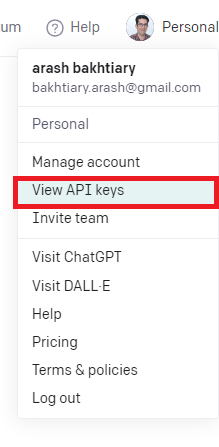

then click on "Create new secret key"

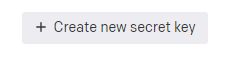

You need to recognize, as a human, how to solve a puzzle like the one below:

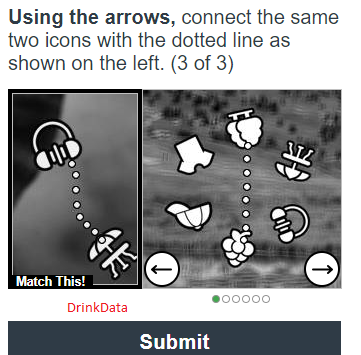

### Get Your API Key:

After subscribing, you'll receive your API key. It's a long string of letters and numbers.

### Replace "YOUR_API_KEY" in the Python Code:

Take the API key you received and replace "YOUR_API_KEY" in the Python code provided earlier with your actual API key.

## Example

In [ ]:
import openai
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier

# Set your OpenAI GPT-3.5 API key
openai.api_key = "YOUR_API_KEY"

class GPT3Transformer(BaseEstimator, TransformerMixin):
    def __init__(self, max_tokens=50):
        self.max_tokens = max_tokens

    def transform(self, X, y=None):
        generated_text = [self._generate_text(prompt) for prompt in X]
        return generated_text
    
    def _generate_text(self, prompt):
        response = openai.Completion.create(
            engine="text-davinci-002",  # Use a valid model name
            prompt=prompt,
            max_tokens=self.max_tokens
        )
        return response.choices[0].text.strip()

    def fit(self, X, y=None):
        return self

# Example data
X = ["Once upon a time,", "In a galaxy far, far away,"]
y = [1, 0]  # Example labels (binary classification)

# Create a pipeline with GPT-3.5 text generation and a simple classifier (Random Forest)
pipeline = Pipeline([
    ('gpt3_transform', GPT3Transformer(max_tokens=100)),
    ('vectorizer', CountVectorizer()),  # Use appropriate vectorization based on your task
    ('classifier', RandomForestClassifier())])

# Fit the pipeline
pipeline.fit(X, y)

# Generate text using GPT-3.5
prompts = ["Tell me about Ali Sharifi Zarchi", "Describe his recent position"]

# Generate text using GPT-3.5
generated_text = pipeline.fit_transform(prompts)

# Print generated text
for prompt, text in zip(prompts, generated_text):
    print(f"Prompt: {prompt}\nGenerated Text: {text}\n{'='*30}")
